In [1]:
import matplotlib.pyplot as plt
from torch import tensor
import torch
import numpy as np
import matplotlib as mpl
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import pdb
import torchvision
import torchvision.transforms as transforms
import os
import math
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [2]:
def get_data():
    train_data = pd.read_csv('fashion-mnist_train.csv')
    test_data = pd.read_csv('fashion-mnist_test.csv')
    x_train = train_data[train_data.columns[1:]].values
    y_train = train_data.label.values
    x_test = test_data[test_data.columns[1:]].values
    y_test = test_data.label.values
    return map(tensor, (x_train, y_train, x_test, y_test))

In [3]:
x_train, y_train, x_test, y_test = get_data()
train_n, train_m = x_train.shape
test_n, test_m = x_test.shape
n_cls = y_train.max()+1

In [4]:
mpl.rcParams['image.cmap'] = 'gray'

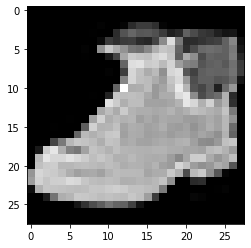

In [5]:
plt.imshow(x_train[torch.randint(train_n, (1,))].view(28, 28))

In [6]:
class convutional_model(nn.Module): 
    def __init__(self):
        super(convutional_model, self).__init__()
        self.convlay_1 = nn.Conv2d(1, 8, 5) 
        self.pool = nn.AvgPool2d(2,2)
        self.convlay_2 = nn.Conv2d(8, 16, 3) 
        self.convlay_3 = nn.Conv2d(16, 32, 3)
        self.convlay_4 = nn.Conv2d(32, 32, 3)
        self.fullycon1 = nn.Linear(32*3*3 , 120)
        self.fullycon2 = nn.Linear(120, 84)
        self.fullycon3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.convlay_1(x)))
        x = self.pool(F.relu(self.convlay_2(x))) 
        x = self.pool(F.relu(self.convlay_3(x))) 
        x = self.pool(F.relu(self.convlay_4(x))) 
        x = x.view(-1, 32*3*3)
        x = F.relu(self.ullycon1(x))
        x = F.relu(self.ullycon2(x))
        x = self.ullycon3(x)
        return x

In [7]:
def train_model(epochs):
    model.train()
    for epoch in range(epochs):
        losses = []
        clas = 0
        for i,batch in range(testset,0):
            data, output = batch
            prediction = model(data)
            loss = costFunction(predcition,output)
            clas += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if i%100 ==0:
                losses.append(append.items())
            if i%1000 ==0:
                print('[%d %d] Loss is : %.4f'% (epoch+1,i+1,clas/1000))
                clas=0
                accuracy()
                plt.plot(losses, label='epoch'+str(epoch))
                plt.legend(loc=1,mode='expanded', shadow = True,ncol=2)
    plt.show()

In [8]:
model = convutional_model()
for param in model.parameters():
    print(str(param.data.numpy().shape)+'\n')
    costfun = nn.CrossEntropyLoss()
    opm = torch.optim.SGD(model.parameters(),lr =0.5, momentum =0.9)

(8, 1, 5, 5)

(8,)

(16, 8, 3, 3)

(16,)

(32, 16, 3, 3)

(32,)

(32, 32, 3, 3)

(32,)

(120, 288)

(120,)

(84, 120)

(84,)

(10, 84)

(10,)



In [9]:
class FashionMnistNet(nn.Module):
    def __init__(self):
        super(FashionMnistNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [10]:
transform = transforms.Compose([
    transforms.RandomVerticalFlip(0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

model = FashionMnistNet()
lr = 0.05 
epochs = 10
bs = 32 
loss_func = F.cross_entropy 
opt = optim.SGD(model.parameters(), lr=lr)
CNN_con_acc = []

In [11]:
def accuracy_model():
    model.eval()
    corrhit= 0
    total = 0
    accuracy = 0
    for batches in x_test:
        data, output = batches
        prediction = model(data)
        _, prediction = torch.max(prediction.data,1)
        total += output.size(0)
        corrhit +=(prediction == output).sum().item()
        accuracy = (corrhit/total)*100
        
    print('The Accuracy of model of Train Set = '+str(accuracy)) 
         

In [12]:
for epoch in range(epochs):
    model.train()
    for i in range((train_n-1)//bs + 1):
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i].float().reshape(bs, 1, 28, 28)
        yb = y_train[start_i:end_i]
        loss = loss_func(model.forward(xb), yb)
        loss.backward()
        opt.step()
        opt.zero_grad()
    model.eval()
    with torch.no_grad():
        total_loss, accuracy = 0., 0.
        for i in range(test_n):
            x = x_test[i].float().reshape(1, 1, 28, 28)
            y = y_test[i]
            pred = model.forward(x)
            accuracy += (torch.argmax(pred) == y).float()
        print("Accuracy of convolutional Model: ", (accuracy*100/test_n).item())
        CNN_con_acc.append((accuracy*100/test_n).item())

Accuracy of convolutional Model:  83.66999816894531
Accuracy of convolutional Model:  84.33999633789062
Accuracy of convolutional Model:  84.16000366210938
Accuracy of convolutional Model:  84.9000015258789
Accuracy of convolutional Model:  83.22000122070312
Accuracy of convolutional Model:  85.05000305175781
Accuracy of convolutional Model:  83.68000030517578
Accuracy of convolutional Model:  84.19999694824219
Accuracy of convolutional Model:  85.13999938964844
Accuracy of convolutional Model:  85.05999755859375


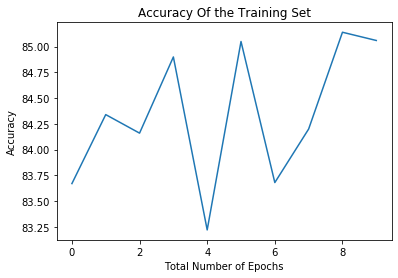

In [13]:
plt.plot(CNN_con_acc)
plt.xlabel('Total Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Of the Training Set')
plt.show()  

In [14]:
x_train, x_test = x_train.float(), x_test.float()
train_mean,train_std = x_train.mean(),x_train.std()
train_mean,train_std

(tensor(72.9505), tensor(89.9669))

In [15]:
def normalize(x, m, s): return (x-m)/s
x_train = normalize(x_train, train_mean, train_std)
x_test = normalize(x_test, train_mean, train_std)

In [16]:
model_wnd = FashionMnistNet()
lr = 0.05 
epochs = 10
bs = 32
loss_func = F.cross_entropy
opt = optim.SGD(model_wnd.parameters(), lr=lr)
accuracy_vals_wnd = []
for epoch in range(epochs):
    model_wnd.train()
    for i in range((train_n-1)//bs + 1):
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i].reshape(bs, 1, 28, 28)
        yb = y_train[start_i:end_i]
        loss = loss_func(model_wnd.forward(xb), yb)
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    model_wnd.eval()
    with torch.no_grad():
        total_loss, accuracy = 0., 0.
        validation_size = int(test_n/10)
        for i in range(test_n):
            x = x_test[i].reshape(1, 1, 28, 28)
            y = y_test[i]
            pred = model_wnd.forward(x)
            accuracy += (torch.argmax(pred) == y).float()
        print(" The Accuracy of the Model for Train: ", (accuracy*100/test_n).item())
        accuracy_vals_wnd.append((accuracy*100/test_n).item())

 The Accuracy of the Model for Train:  85.05999755859375
 The Accuracy of the Model for Train:  87.3499984741211
 The Accuracy of the Model for Train:  88.31999969482422
 The Accuracy of the Model for Train:  88.70999908447266
 The Accuracy of the Model for Train:  88.7699966430664
 The Accuracy of the Model for Train:  88.81999969482422
 The Accuracy of the Model for Train:  88.9800033569336
 The Accuracy of the Model for Train:  89.23999786376953
 The Accuracy of the Model for Train:  89.29000091552734
 The Accuracy of the Model for Train:  89.5


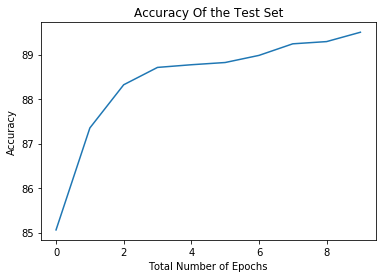

In [17]:
plt.plot(accuracy_vals_wnd)
plt.xlabel('Total Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Of the Test Set')
plt.show()  

In [18]:
def find_lr(net, loss_func, init_value = 1e-8, final_value=10., beta = 0.98, bs = 32):
    num = (train_n-1)//bs + 1 # num of batches 
    mult = (final_value/init_value) ** (1/num)
    lr = init_value
    optimizer = optim.SGD(net.parameters(), lr=lr)
    avg_loss = 0.
    best_loss = 0.
    batch_num = 0.
    losses = []
    log_lrs = []
    for i in range((train_n-1)//bs + 1):
        batch_num += 1
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i].reshape(bs, 1, 28, 28)
        yb = y_train[start_i:end_i]
        optimizer.zero_grad()
        outputs = net.forward(xb)
        loss = loss_func(outputs, yb)
        print("loss of the Model: ", loss.item())
        avg_loss = beta * avg_loss + (1-beta) *loss.item()
        smoothed_loss = avg_loss / (1 - beta**batch_num)
        if batch_num > 1 and smoothed_loss > 4 * best_loss:
            return log_lrs, losses
        if smoothed_loss < best_loss or batch_num==1:
            best_loss = smoothed_loss
        losses.append(smoothed_loss)
        log_lrs.append(math.log10(lr))
        loss.backward()
        optimizer.step()
        lr *= mult
        optimizer.param_groups[0]['lr'] = lr
    return log_lrs, losses

In [19]:
model_lrfinder = FashionMnistNet()
bs = 32
loss_func = F.cross_entropy
log_lrs, losses = find_lr(model_lrfinder, loss_func)

loss of the Model:  2.308398962020874
loss of the Model:  2.2936906814575195
loss of the Model:  2.3047614097595215
loss of the Model:  2.2889158725738525
loss of the Model:  2.298851728439331
loss of the Model:  2.302227020263672
loss of the Model:  2.2953407764434814
loss of the Model:  2.3105905055999756
loss of the Model:  2.2983453273773193
loss of the Model:  2.287686586380005
loss of the Model:  2.3202335834503174
loss of the Model:  2.2780399322509766
loss of the Model:  2.2819480895996094
loss of the Model:  2.2843241691589355
loss of the Model:  2.297062873840332
loss of the Model:  2.299933910369873
loss of the Model:  2.279641628265381
loss of the Model:  2.3052380084991455
loss of the Model:  2.2992818355560303
loss of the Model:  2.3070032596588135
loss of the Model:  2.3097267150878906
loss of the Model:  2.292670488357544
loss of the Model:  2.323208808898926
loss of the Model:  2.2964370250701904
loss of the Model:  2.2899086475372314
loss of the Model:  2.303489923477

loss of the Model:  2.287213087081909
loss of the Model:  2.2783403396606445
loss of the Model:  2.2917068004608154
loss of the Model:  2.2911524772644043
loss of the Model:  2.2703475952148438
loss of the Model:  2.3360977172851562
loss of the Model:  2.285616874694824
loss of the Model:  2.304185628890991
loss of the Model:  2.292990207672119
loss of the Model:  2.2872354984283447
loss of the Model:  2.2958314418792725
loss of the Model:  2.294780969619751
loss of the Model:  2.2769241333007812
loss of the Model:  2.3057668209075928
loss of the Model:  2.322077989578247
loss of the Model:  2.293729782104492
loss of the Model:  2.2833375930786133
loss of the Model:  2.275442361831665
loss of the Model:  2.291583299636841
loss of the Model:  2.314891815185547
loss of the Model:  2.30489444732666
loss of the Model:  2.3162100315093994
loss of the Model:  2.3018622398376465
loss of the Model:  2.2958247661590576
loss of the Model:  2.305652379989624
loss of the Model:  2.309203624725342


loss of the Model:  2.2797725200653076
loss of the Model:  2.305781602859497
loss of the Model:  2.2980294227600098
loss of the Model:  2.3026793003082275
loss of the Model:  2.3116519451141357
loss of the Model:  2.3019917011260986
loss of the Model:  2.3087949752807617
loss of the Model:  2.2793707847595215
loss of the Model:  2.301159381866455
loss of the Model:  2.3099827766418457
loss of the Model:  2.291532516479492
loss of the Model:  2.3021700382232666
loss of the Model:  2.2986884117126465
loss of the Model:  2.299736261367798
loss of the Model:  2.266073703765869
loss of the Model:  2.3132476806640625
loss of the Model:  2.324399948120117
loss of the Model:  2.310307741165161
loss of the Model:  2.3042047023773193
loss of the Model:  2.2896463871002197
loss of the Model:  2.293555498123169
loss of the Model:  2.294039011001587
loss of the Model:  2.288559913635254
loss of the Model:  2.295891046524048
loss of the Model:  2.285851001739502
loss of the Model:  2.293016433715820

loss of the Model:  2.3186752796173096
loss of the Model:  2.2915046215057373
loss of the Model:  2.29556941986084
loss of the Model:  2.2883617877960205
loss of the Model:  2.310453176498413
loss of the Model:  2.320327043533325
loss of the Model:  2.3126609325408936
loss of the Model:  2.2703962326049805
loss of the Model:  2.2938525676727295
loss of the Model:  2.3080861568450928
loss of the Model:  2.3047664165496826
loss of the Model:  2.3019025325775146
loss of the Model:  2.309314489364624
loss of the Model:  2.293149709701538
loss of the Model:  2.287245750427246
loss of the Model:  2.3086063861846924
loss of the Model:  2.2872114181518555
loss of the Model:  2.281755208969116
loss of the Model:  2.2976467609405518
loss of the Model:  2.303856372833252
loss of the Model:  2.300800323486328
loss of the Model:  2.3228094577789307
loss of the Model:  2.2714650630950928
loss of the Model:  2.2973620891571045
loss of the Model:  2.2850584983825684
loss of the Model:  2.2873902320861

loss of the Model:  2.3278145790100098
loss of the Model:  2.2849886417388916
loss of the Model:  2.2971174716949463
loss of the Model:  2.3194427490234375
loss of the Model:  2.2974624633789062
loss of the Model:  2.305417537689209
loss of the Model:  2.2651355266571045
loss of the Model:  2.3053181171417236
loss of the Model:  2.3001391887664795
loss of the Model:  2.2932631969451904
loss of the Model:  2.2963333129882812
loss of the Model:  2.31050968170166
loss of the Model:  2.3087332248687744
loss of the Model:  2.2819669246673584
loss of the Model:  2.3019068241119385
loss of the Model:  2.2717387676239014
loss of the Model:  2.299497604370117
loss of the Model:  2.2848379611968994
loss of the Model:  2.289508819580078
loss of the Model:  2.3100733757019043
loss of the Model:  2.3076024055480957
loss of the Model:  2.289489507675171
loss of the Model:  2.307932138442993
loss of the Model:  2.284850835800171
loss of the Model:  2.315084218978882
loss of the Model:  2.307449579238

loss of the Model:  2.2790844440460205
loss of the Model:  2.3146347999572754
loss of the Model:  2.278322458267212
loss of the Model:  2.309727907180786
loss of the Model:  2.2879397869110107
loss of the Model:  2.322202205657959
loss of the Model:  2.3126206398010254
loss of the Model:  2.303065776824951
loss of the Model:  2.3055412769317627
loss of the Model:  2.3007895946502686
loss of the Model:  2.2823219299316406
loss of the Model:  2.2735257148742676
loss of the Model:  2.2906267642974854
loss of the Model:  2.2749197483062744
loss of the Model:  2.3029401302337646
loss of the Model:  2.280527353286743
loss of the Model:  2.268012285232544
loss of the Model:  2.2844557762145996
loss of the Model:  2.2798948287963867
loss of the Model:  2.300579309463501
loss of the Model:  2.301741123199463
loss of the Model:  2.2983815670013428
loss of the Model:  2.26672101020813
loss of the Model:  2.2769041061401367
loss of the Model:  2.286489248275757
loss of the Model:  2.28811907768249

loss of the Model:  2.111471652984619
loss of the Model:  2.1541874408721924
loss of the Model:  2.087346315383911
loss of the Model:  2.101994752883911
loss of the Model:  2.065451145172119
loss of the Model:  2.073493003845215
loss of the Model:  2.143404960632324
loss of the Model:  2.141037702560425
loss of the Model:  2.0591189861297607
loss of the Model:  2.0540921688079834
loss of the Model:  1.9678192138671875
loss of the Model:  2.0395660400390625
loss of the Model:  2.006990909576416
loss of the Model:  2.0555078983306885
loss of the Model:  2.0364317893981934
loss of the Model:  2.014177083969116
loss of the Model:  1.9824271202087402
loss of the Model:  2.0207107067108154
loss of the Model:  2.0130977630615234
loss of the Model:  1.9018152952194214
loss of the Model:  1.9529742002487183
loss of the Model:  1.916594386100769
loss of the Model:  1.9410890340805054
loss of the Model:  1.9512535333633423
loss of the Model:  1.7581610679626465
loss of the Model:  1.9220387935638

loss of the Model:  0.9220262169837952
loss of the Model:  1.1450889110565186
loss of the Model:  1.1295921802520752
loss of the Model:  0.9178407788276672
loss of the Model:  1.325478196144104
loss of the Model:  1.1237655878067017
loss of the Model:  0.7805820107460022
loss of the Model:  0.9855465292930603
loss of the Model:  1.4547065496444702
loss of the Model:  0.6921455264091492
loss of the Model:  0.748667299747467
loss of the Model:  0.8052021861076355
loss of the Model:  0.6945894956588745
loss of the Model:  0.7067367434501648
loss of the Model:  0.5006552338600159
loss of the Model:  0.971062958240509
loss of the Model:  0.4864582419395447
loss of the Model:  0.5977144241333008
loss of the Model:  0.9757713675498962
loss of the Model:  2.773607015609741
loss of the Model:  1.2081674337387085
loss of the Model:  1.7340764999389648
loss of the Model:  1.4729455709457397
loss of the Model:  1.2965526580810547
loss of the Model:  0.9009799957275391
loss of the Model:  1.6197173

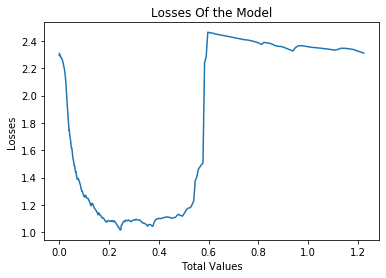

In [20]:
plt.plot([10**x for x in log_lrs], losses,)
plt.xlabel('Total Values')
plt.ylabel('Losses')
plt.title('Losses Of the Model')
plt.show()  